## <center> Credit Card Fraud Detection Using Machine Learning Techniques</center>

In this notebook we will be looking into the credit card activity data and try to identify fradulent behavior using  different machine learning techniques like supervised & unsupervised learning. We will perform exploratory data analysis to learn more insights from the data, run through different models and caculate accuracies to identify the best model among them. Data source is the kaggle dataset.


<h3> Introduction </h3>

The Association of Certified Fraud Examiners (ACFE) released its biannual 2016 report last week.  According to the report, the typical organization loses 5 percent of its revenue to fraud each year.  The losses caused by fraud reported in the study found an average loss of dollar 2.7 million per case, with dollar 150,000 being the median loss. 

Small organizations are particularly vulnerable to fraud because they have significantly lower implementation rate of anti-fraud controls and have fewer resources to withstand losses. Small organizations also are much less likely to have anti-fraud controls in place than larger organizations.

In this notebook, we will identify how ML can be used to fight fraud by using data. Apply supervised learning algorithms to detect fraudulent behavior based upon past fraud, and use unsupervised learning methods to discover new types of fraud activities.

Fraudulent transactions are usually rare in occurances compared to the normal transactions. So we will inspect the activity trends in the data and learn to properly classify imbalanced datasets. 

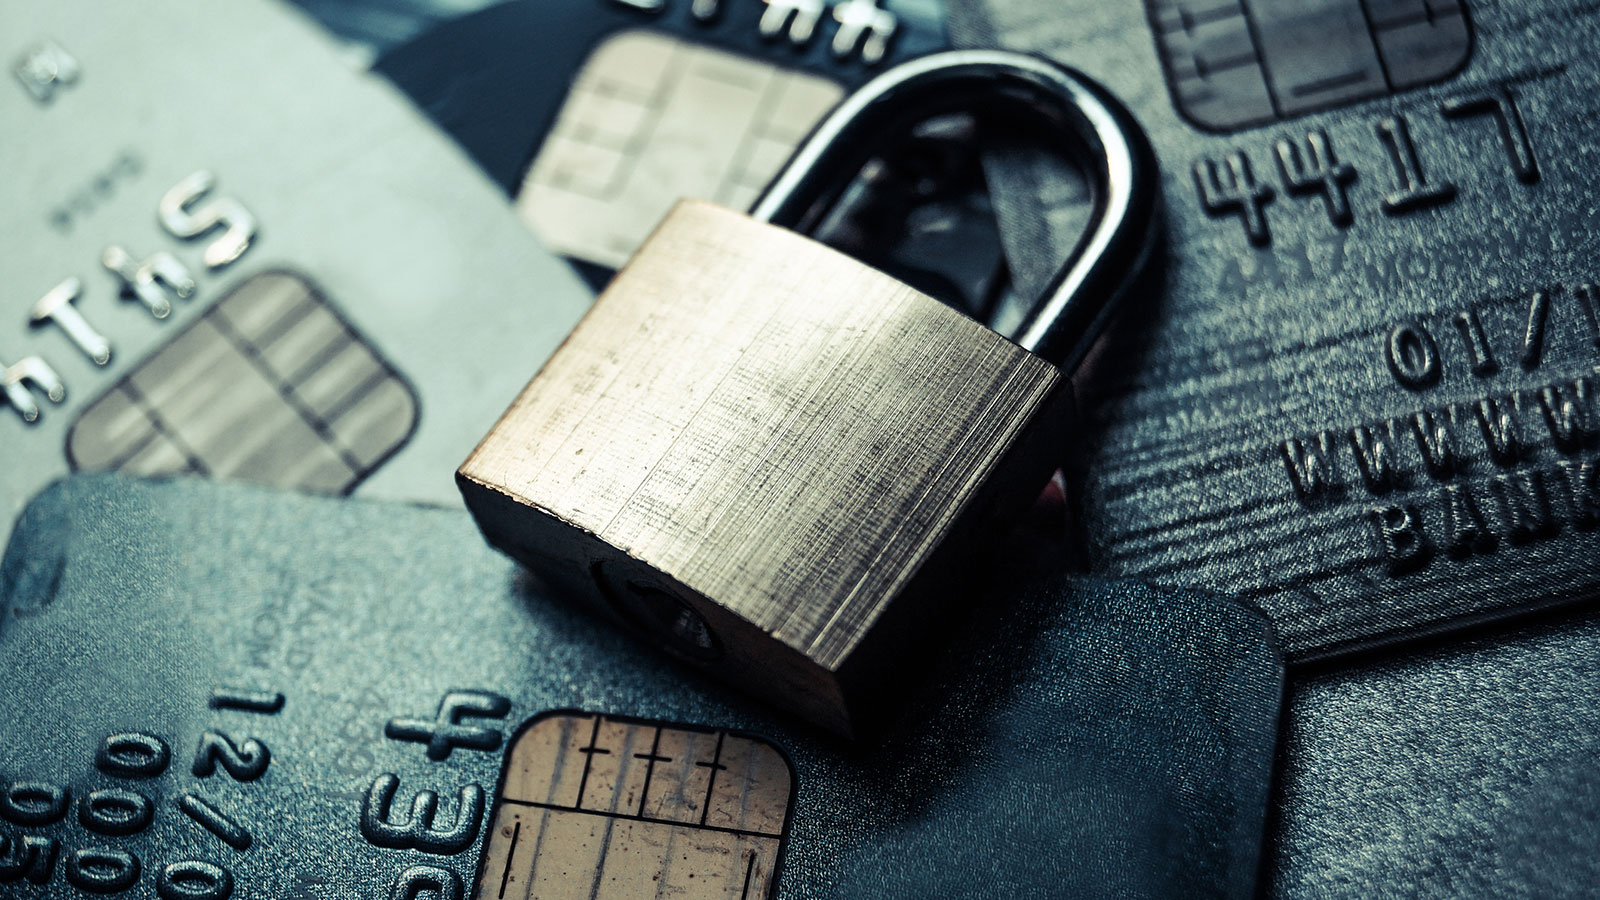

<h3> Business Problem Statement </h3>

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase. 

A dataset that contains transactions made by credit cards in September 2013 by European cardholders is provided. Using this dataset that contains transactions that occurred in two days, in which we have 492 frauds out of 284,807 transactions, find a pattern and help us in classifying the fraud activity. 

<h3> Target Audience </h3>

Who will be more interested in this project? What type of clients or a group of people would be benefitted?

Small to large scale credit card companies who wants to use the advancement of machine learning to help them reduce the cost incurred due to improper fraud classification. This analysis will be help them in identify the ways how ml models can be used to identify pattern in their datas and help in reducing the loss incurred due to the fraudulent activities.

E-commerce businesses must continuously assess the legitimacy of client transactions so they can use this models in helping to classify their transactions and all the client activities. 


Data Scientists, who wish to learn about the finance world and the credit card activities can use this as a baseline model in their research & further apply other statistical & machine learning techniques with additional data sources  obtain a more sophisticated information. Also perform some operations on it and, finally be able to tell a story out of it.

It can cater to the below industries were fraud activites have a huge impact:
    <ul>
    <li>Insurance</li>
                    <li>Credit card</li>
                    <li>Identity theft</li>
                    <li>Money laundering</li>
                    <li>Tax evasion</li>
                    <li>Healthcare</li>
                    <li>Product warranty</li> </ul>

<h3> Data </h3>

In this analysis we are going to be using the <a href='https://www.kaggle.com/mlg-ulb/creditcardfraud'> kaggle dataset</a>. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. Given the class imbalance ratio, we will be measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

<h4>Key Challenges:</h4>


It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, the original features and more background information about the data is not provided. 

Dataset contains following features V1, V2, … V28 which are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 

The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

<h4> Import modules </h4>

In [512]:
import numpy as np
import pandas as pd
import random
import copy
import timeit
import pickle
import dill
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import scipy.stats as stats
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.metrics import plot_confusion_matrix
from datetime import datetime

In [413]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

<h4> Data Loading & Inspecting </h4>

In [25]:
credit_card_df = pd.read_csv('/Users/knarendran/Downloads/check_RIDOH/creditcard.csv')
credit_card_df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [150]:
print('This data frame has {} rows and {} columns.'.format(credit_card_df.shape[0], credit_card_df.shape[1]))

This data frame has 284807 rows and 31 columns.


Just inspecting the data by performing few basics operations like info & describe to get base statistics & information about the existing value.

In [27]:
#peek at data
credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [125]:
#Count Null values
credit_card_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Counted the existence of the number of null values and the result shows zero null value is present in the any of the feature. It is a good sign since no data imputation needs to be performed or no other assumptions need to be established.

In [28]:
#numerical summary -> only non-anonymized columns of interest
pd.set_option('precision', 3)
credit_card_df.loc[:, ['Time', 'Amount']].describe()

Time      Amount
count  284807.000  284807.000
mean    94813.860      88.350
std     47488.146     250.120
min         0.000       0.000
25%     54201.500       5.600
50%     84692.000      22.000
75%    139320.500      77.165
max    172792.000   25691.160

The summary statistics for time and amount shows that they have same number of inputs in the data. It shows the highest or the mean of both the features in the dataset. Also provides other information which helps us to understand the provided dataset.

<h4>Data Visualization</h4>

<h5>Visualizations of Time </h5>


<AxesSubplot:title={'center':'Distribution plot to visualize of Time Feature'}, xlabel='Time', ylabel='Density'>

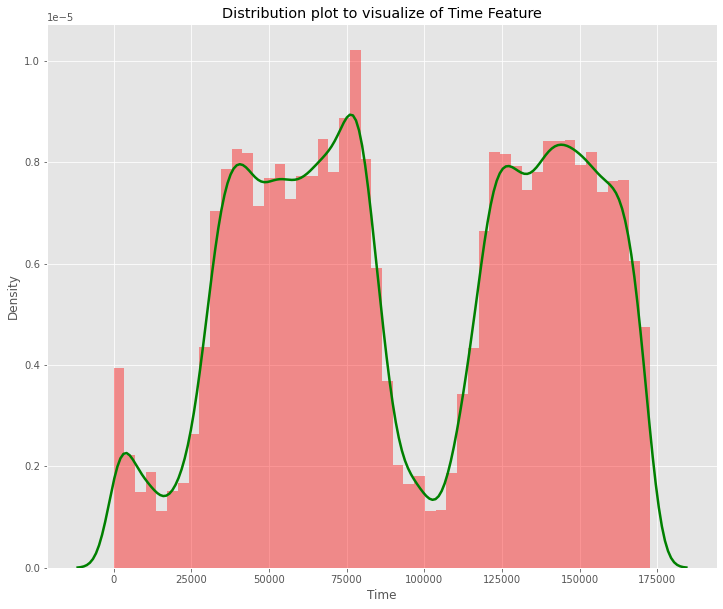

In [147]:
plt.figure(figsize=(12,10))
plt.title('Distribution plot to visualize of Time Feature')
sns.distplot(credit_card_df.Time, color = "red", kde_kws={"color": "g", "lw":2.5})

We can find two peaks or high density around 25000 - 75000 & 125000 - 160000 which says that too many transactions have occured in those times. It also shows that 94813 value to be having the highes peak density of all the time in the data. This distribution shows us that the time distribution exhibits a biomodal distribution for this datatset.

<h5>Visualization of Amount</h5>

<AxesSubplot:title={'center':'Distribution of Money'}, xlabel='Amount', ylabel='Density'>

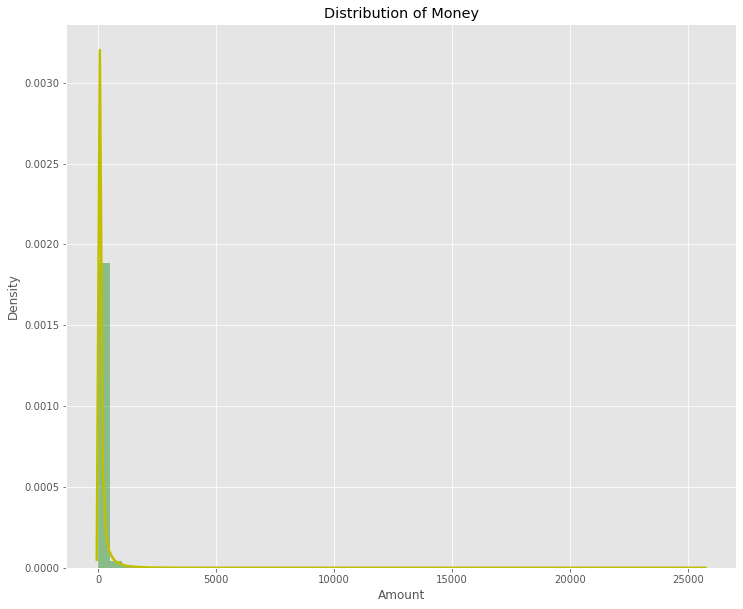

In [149]:
plt.figure(figsize=(12,10))
plt.title('Distribution of Money')
sns.distplot(credit_card_df.Amount, color = "green", kde_kws={"color": "y", "lw":2.5})

Distribution plot for the amount feature in the dataset exhibits only one peak 0 - 100. Around 88 dollars is the mean of all credit card transactions in this data set. One of the highest transaction in this dataset seems to have a monetary value of around 25,691 dollars. Amount feature in the dataset shows a right skewed distribution.



<h5> Dataset Features visualization </h5>

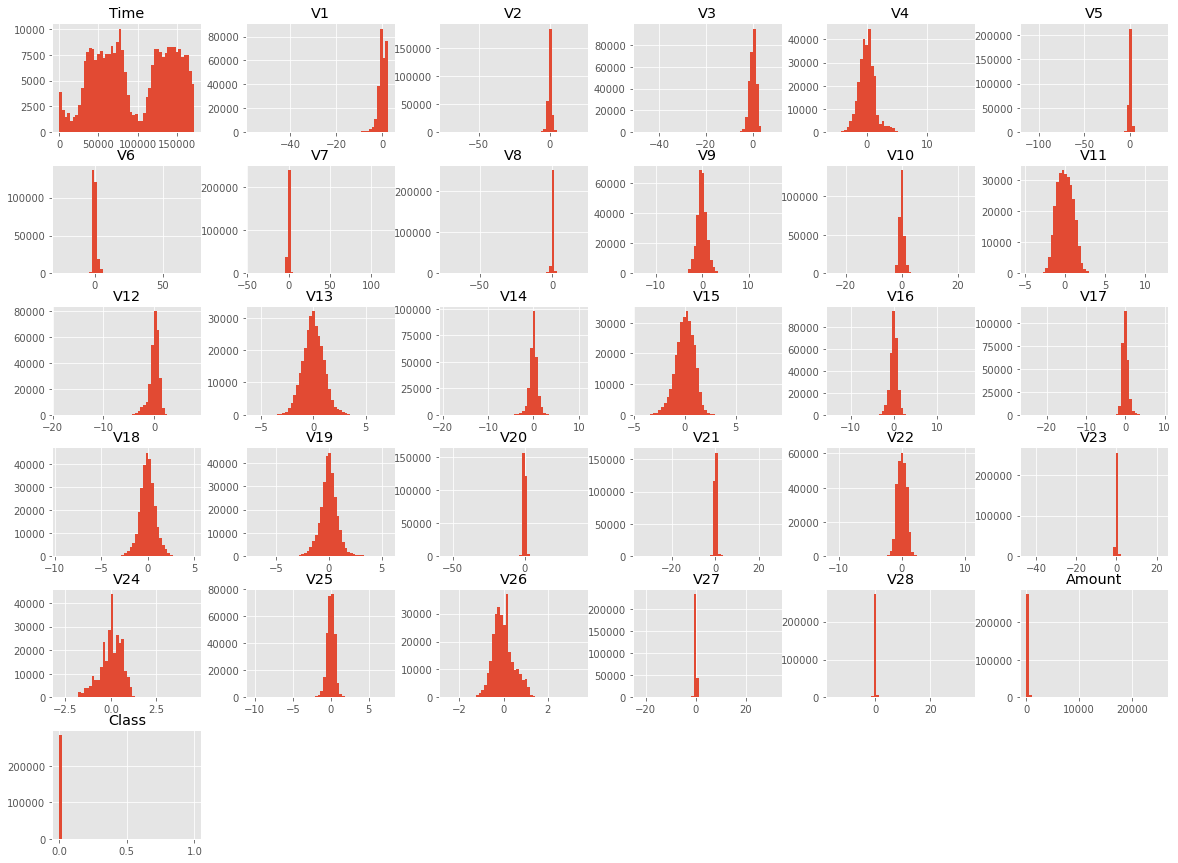

In [160]:
credit_card_df.hist(bins=50,figsize=(20,15))
plt.show()

<h5> Correlation of the feature to the target variable </h5>

In [162]:
corr = credit_card_df.corr()
corr

Time         V1         V2         V3         V4         V5  \
Time    1.000  1.174e-01 -1.059e-02 -4.196e-01 -1.053e-01  1.731e-01   
V1      0.117  1.000e+00  4.136e-16 -1.228e-15 -9.215e-16  1.813e-17   
V2     -0.011  4.136e-16  1.000e+00  3.244e-16 -1.121e-15  5.158e-16   
V3     -0.420 -1.228e-15  3.244e-16  1.000e+00  4.711e-16 -6.539e-17   
V4     -0.105 -9.215e-16 -1.121e-15  4.711e-16  1.000e+00 -1.720e-15   
V5      0.173  1.813e-17  5.158e-16 -6.539e-17 -1.720e-15  1.000e+00   
V6     -0.063 -6.507e-16  2.787e-16  1.628e-15 -7.492e-16  2.408e-16   
V7      0.085 -1.005e-15  2.056e-16  4.895e-16 -4.105e-16  2.716e-16   
V8     -0.037 -2.434e-16 -5.377e-17 -1.269e-15  5.697e-16  7.437e-16   
V9     -0.009 -1.514e-16  1.978e-17  5.568e-16  6.923e-16  7.392e-16   
V10     0.031  7.388e-17 -3.991e-16  1.157e-15  2.233e-16 -5.202e-16   
V11    -0.248  2.125e-16  1.975e-16  1.577e-15  3.459e-16  7.204e-16   
V12     0.124  2.053e-16 -9.569e-17  6.310e-16 -5.626e-16  7.413e-16   
V13    -0.066 -2.426e-17  6.295e-16  2.808e-16  1.303e-16  5.887e-16   
V14    -0.099 -5.020e-16 -1.731e-16  4.740e-16  2.282e-16  6.565e-16   
V15    -0.183  3.548e-16 -4.996e-17  9.069e-16  1.378e-16 -8.720e-16   
V16     0.012  7.213e-17  1.177e-17  8.299e-16 -9.615e-16  2.246e-15   
V17    -0.073 -3.880e-16 -2.685e-16  7.615e-16 -2.700e-16  1.282e-16   
V18     0.090  3.230e-17  3.285e-16  1.510e-16 -5.104e-16  5.309e-16   
V19     0.029  1.502e-16 -7.119e-18  3.464e-16 -3.981e-16 -1.450e-16   
V20    -0.051  4.655e-16  2.507e-16 -9.316e-16 -1.857e-16 -3.554e-16   
V21     0.045 -2.457e-16 -8.480e-17  5.706e-17 -1.950e-16 -3.921e-16   
V22     0.144 -4.291e-16  1.526e-16 -1.134e-15 -6.276e-17  1.254e-16   
V23     0.051  6.169e-16  1.634e-16 -4.983e-16  9.164e-17 -8.429e-18   
V24    -0.016 -4.425e-17  1.248e-17  2.687e-19  1.585e-16 -1.149e-15   
V25    -0.233 -9.606e-16 -4.479e-16 -1.105e-15  6.071e-16  4.809e-16   
V26    -0.041 -1.581e-17  2.057e-16 -1.238e-16 -4.247e-16  4.320e-16   
V27    -0.005  1.198e-16 -4.967e-16  1.046e-15  3.977e-17  6.590e-16   
V28    -0.009  2.083e-15 -5.094e-16  9.776e-16 -2.761e-18 -5.614e-18   
Amount -0.011 -2.277e-01 -5.314e-01 -2.109e-01  9.873e-02 -3.864e-01   
Class  -0.012 -1.013e-01  9.129e-02 -1.930e-01  1.334e-01 -9.497e-02   

               V6         V7         V8         V9  ...        V21        V22  \
Time   -6.302e-02  8.471e-02 -3.695e-02 -8.660e-03  ...  4.474e-02  1.441e-01   
V1     -6.507e-16 -1.005e-15 -2.434e-16 -1.514e-16  ... -2.457e-16 -4.291e-16   
V2      2.787e-16  2.056e-16 -5.377e-17  1.978e-17  ... -8.480e-17  1.526e-16   
V3      1.628e-15  4.895e-16 -1.269e-15  5.568e-16  ...  5.706e-17 -1.134e-15   
V4     -7.492e-16 -4.105e-16  5.697e-16  6.923e-16  ... -1.950e-16 -6.276e-17   
V5      2.408e-16  2.716e-16  7.437e-16  7.392e-16  ... -3.921e-16  1.254e-16   
V6      1.000e+00  1.192e-16 -1.104e-16  4.131e-16  ...  5.833e-17 -4.705e-19   
V7      1.192e-16  1.000e+00  3.344e-16  1.123e-15  ... -2.028e-16 -8.899e-16   
V8     -1.104e-16  3.344e-16  1.000e+00  4.356e-16  ...  3.893e-16  2.027e-16   
V9      4.131e-16  1.123e-15  4.356e-16  1.000e+00  ...  1.937e-16 -7.072e-16   
V10     5.932e-17 -7.493e-17 -2.801e-16 -4.642e-16  ...  1.178e-15 -6.418e-16   
V11     1.981e-15  1.425e-16  2.487e-16  1.355e-16  ... -5.658e-16  7.773e-16   
V12     2.375e-16 -3.537e-18  1.840e-16 -1.079e-15  ...  7.301e-16  1.645e-16   
V13    -1.211e-16  1.266e-17 -2.922e-16  2.251e-15  ...  1.008e-16  6.748e-17   
V14     2.621e-16  2.608e-16 -8.599e-16  3.785e-15  ... -3.357e-16  3.740e-16   
V15    -1.531e-15 -1.691e-16  4.128e-16 -1.051e-15  ...  6.605e-17 -4.209e-16   
V16     2.624e-18  5.869e-17 -5.255e-16 -1.214e-15  ... -4.715e-16 -7.923e-17   
V17     2.016e-16  2.177e-16 -2.270e-16  1.114e-15  ... -8.231e-16 -8.743e-16   
V18     1.224e-16  7.604e-17 -3.668e-16  4.993e-16  ... -9.409e-16 -4.819e-16   
V19    -1.866e-16 -1.881e-16 -3.875e-16 -1.376e-16  ...  5.116e-16 -1.164e-15   
V20

Text(0.5, 1.0, 'Heatmap of Correlation')

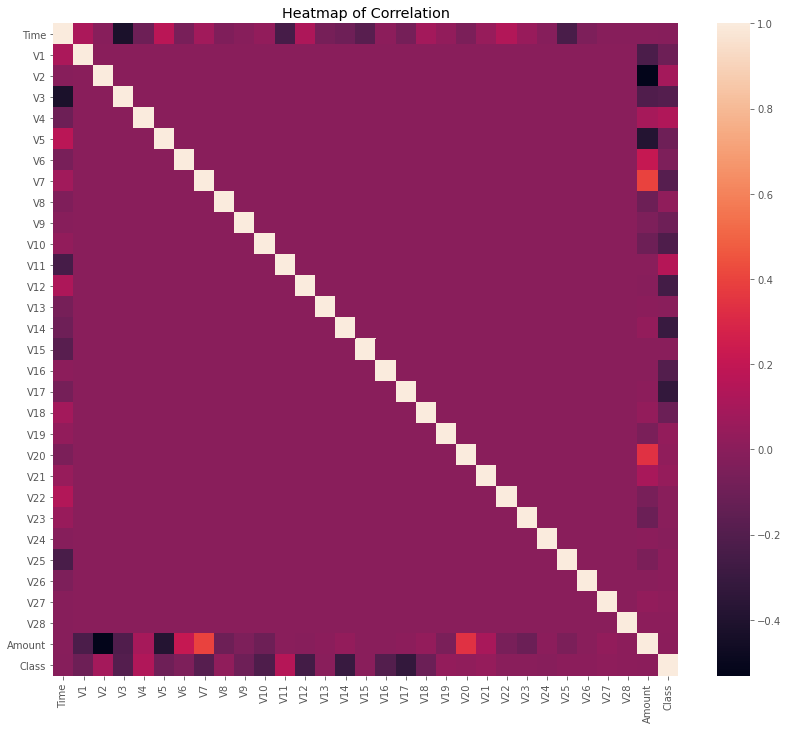

In [163]:
corr = credit_card_df.corr()
plt.figure(figsize=(14,12))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

In [164]:
skew_ = credit_card_df.skew()
skew_

Time      -0.036
V1        -3.281
V2        -4.625
V3        -2.240
V4         0.676
V5        -2.426
V6         1.827
V7         2.554
V8        -8.522
V9         0.555
V10        1.187
V11        0.357
V12       -2.278
V13        0.065
V14       -1.995
V15       -0.308
V16       -1.101
V17       -3.845
V18       -0.260
V19        0.109
V20       -2.037
V21        3.593
V22       -0.213
V23       -5.875
V24       -0.552
V25       -0.416
V26        0.577
V27       -1.170
V28       11.192
Amount    16.978
Class     23.998
dtype: float64

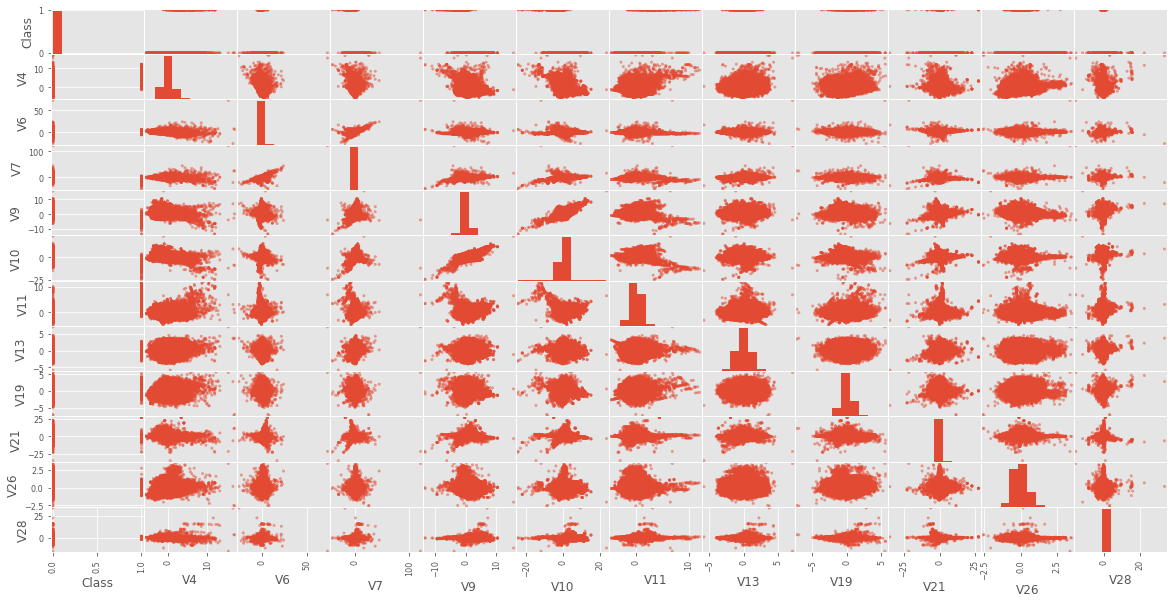

In [186]:
#For features that tends to have positive correlation with target variable Class, plotting a scatter between them.
attributes = ["Class", "V4", "V6", "V7", "V9", "V10", "V11", "V13", "V19", "V21", "V26", "V28"]
scatter_matrix(credit_card_df[attributes], figsize=(20,10))
plt.show()    


There seems to be no linear correlation between the target attribute and the features. Also the number of positive correlation examples are more greater than the number of negative value correlation examples. Hence, the problem is a clear case of anomally detection.


<h5> Visualization of the Class label</h5>

In [188]:
class_count = credit_card_df.Class.value_counts()
normal_trans = class_count[0]
fraud_trans = class_count[1]
class_count

0    284315
1       492
Name: Class, dtype: int64

In [191]:
total_trans = normal_trans + fraud_trans
normal_trans_percent = (normal_trans/total_trans)*100
fraud_trans_percent = (fraud_trans/total_trans)*100
print("There were total {} normal transactions which accounted for {:.2f}% of the data in this dataset and {} fraudulent transactions which accounted for {:.3f}% of the data in this dataset.".format(normal_trans, normal_trans_percent, fraud_trans, fraud_trans_percent))


There were total 284315 normal transactions which accounted for 99.83% of the data in this dataset and 492 fraudulent transactions which accounted for 0.173% of the data in this dataset.


Text(0.5, 0, 'Class Label - 0:Normal, 1:Fraudulent')

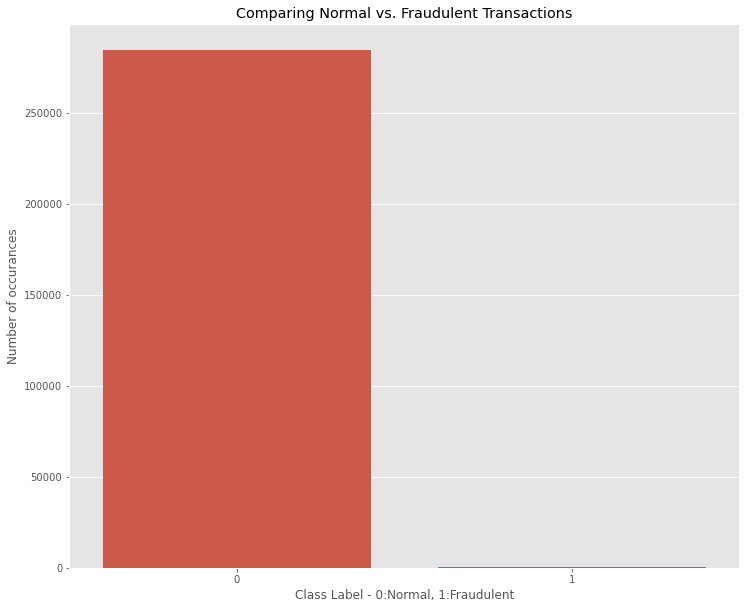

In [192]:
plt.figure(figsize=(12,10))
sns.barplot(x=counts.index, y=counts)
plt.title('Comparing Normal vs. Fraudulent Transactions')
plt.ylabel('Number of occurances')
plt.xlabel('Class Label - 0:Normal, 1:Fraudulent')

This clearly shows us that the dataset is indeed unbalanced. It shows very less fraudulent data and too many normal transactions. This is one of the challenges faced in handling this dataset even in real world problems this is a common occurence of missing data or no data from which the machine learning model can learn more about the fraudulent activities. If this is not handled properly in the real world problems then that can create a bais in the classification model that is built using this data. Such a model can be a biased model and may not work as efficiently as we want it to be. So in this notebook we have handled this unbalanced data using one of the approach but there are different approaches that can be taken to handle it in a correct way possible. To overcome this limitation we are using scaling approach before building the model for the dataset.

<h4>Scaling Amount and Time</h4>

We are scaling the amount and time features in the dataset and dropping the existing values after storing the normalized time & amount values to the dataframe.

In [194]:
#Normalize Time using standardscaler 
scaler = StandardScaler()
scaled_time = scaler.fit_transform(credit_card_df[['Time']])
flatten_list = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flatten_list)

In [195]:
#Normalize Amount using standardscaler 
scaler = StandardScaler()
scaled_amount = scaler2.fit_transform(credit_card_df[['Amount']])
flatten_list = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flatten_list)

In [206]:
#Add new normalized columns into the dataframe
df = pd.concat([credit_card_df, scaled_amount.rename('Normalized_Amount'), scaled_time.rename('Normalized_Time')], axis=1)
df.sample(5)

Time     V1     V2     V3     V4     V5     V6     V7     V8  \
157952  110673.0 -0.576  0.595  2.018 -0.079  0.969  0.247  0.334 -0.220   
108532   70950.0  1.203  0.159  0.137  0.951 -0.206 -0.494  0.017  0.019   
80506    58517.0  1.433 -1.134  0.028 -1.468 -1.120 -0.491 -0.755 -0.276   
49236    43969.0  1.116 -0.211  0.754  0.517 -0.552  0.146 -0.494  0.134   
61095    49658.0 -0.697  1.543  0.506  0.245  0.216 -0.459  0.367  0.270   

           V9  ...    V23    V24    V25    V26    V27    V28  Amount  Class  \
157952  1.281  ... -0.358 -1.121  0.331 -0.305 -0.098 -0.150    4.51      0   
108532 -0.018  ... -0.144 -0.045  0.645 -0.321 -0.003  0.005   15.02      0   
80506  -1.958  ... -0.148 -0.433  0.508 -0.166  0.021  0.028   89.70      0   
49236   0.513  ... -0.023 -0.444  0.154  0.344  0.008  0.028   54.74      0   
61095  -0.726  ... -0.013 -0.469 -0.538  0.136  0.139  0.160    4.49      0   

        Normalized_Amount  Normalized_Time  
157952             -0.335            0.334  
108532             -0.293           -0.503  
80506               0.005           -0.764  
49236              -0.134           -1.071  
61095              -0.335           -0.951  

[5 rows x 33 columns]

In [207]:
#Drop old amount and time columns
df.drop(['Amount', 'Time'], axis=1, inplace=True)
df.head()

V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  ...  \
0 -1.360 -0.073  2.536  1.378 -0.338  0.462  0.240  0.099  0.364  0.091  ...   
1  1.192  0.266  0.166  0.448  0.060 -0.082 -0.079  0.085 -0.255 -0.167  ...   
2 -1.358 -1.340  1.773  0.380 -0.503  1.800  0.791  0.248 -1.515  0.208  ...   
3 -0.966 -0.185  1.793 -0.863 -0.010  1.247  0.238  0.377 -1.387 -0.055  ...   
4 -1.158  0.878  1.549  0.403 -0.407  0.096  0.593 -0.271  0.818  0.753  ...   

     V22    V23    V24    V25    V26    V27    V28  Class  Normalized_Amount  \
0  0.278 -0.110  0.067  0.129 -0.189  0.134 -0.021      0              0.245   
1 -0.639  0.101 -0.340  0.167  0.126 -0.009  0.015      0             -0.342   
2  0.772  0.909 -0.689 -0.328 -0.139 -0.055 -0.060      0              1.161   
3  0.005 -0.190 -1.176  0.647 -0.222  0.063  0.061      0              0.141   
4  0.798 -0.137  0.141 -0.206  0.502  0.219  0.215      0             -0.073   

   Normalized_Time  
0           -1.997  
1           -1.997  
2           -1.997  
3           -1.997  
4           -1.997  

[5 rows x 31 columns]

<h3> Data Modelling</h3>

<h4>Splitting Data into Train and Test</h4>

In [261]:
df_copy = df.copy()
Y = df["Class"]
X = df

(train_X, test_X, train_Y, test_Y) = train_test_split(X, Y, test_size= 0.3, random_state= 42)
print("Shape of train_X: ", train_X.shape)
print("Shape of test_X: ", test_X.shape)
print("Shape of train_Y: ", train_Y.shape)
print("Shape of test_Y: ", test_Y.shape)

Shape of train_X:  (199364, 31)
Shape of test_X:  (85443, 31)
Shape of train_Y:  (199364,)
Shape of test_Y:  (85443,)


In [262]:
train_X.reset_index(drop=True, inplace=True)
train_Y.reset_index(drop=True, inplace=True)
test_X.reset_index(drop=True, inplace=True)
test_Y.reset_index(drop=True, inplace=True)

<h4>Creating subsample data set explicitly selecting data so a balanced class distributions is achieved</h4>

In [263]:
fraud_trans_count = train_X.Class.value_counts()[1]

print("Total number of fradulent transactions in the train dataset is {}".format(fraud_trans_count))

Total number of fradulent transactions in the train dataset is 356


In [264]:
non_fraud_trans_count = train_X.Class.value_counts()[0]

print("Total number of normal transactions in the train dataset is {}".format(non_fraud_trans_count))

Total number of normal transactions in the train dataset is 199008


To handle the imbalance in the data we are explicitly selecting the same number of fraud & normal transactions from the dataset.

In [265]:
normal_trans = train_X[train_X['Class'] == 0]
fraud_trans = train_X[train_X['Class'] == 1]

new_df = normal_trans.sample(fraud_trans_count)
new_df.reset_index(drop=True, inplace=True)
new_df.head()


V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  ...  \
0 -0.593 -0.265  0.145 -0.544  1.009  0.416  0.883 -0.203  0.384 -0.214  ...   
1  0.200  0.977 -2.135 -0.237  3.612  3.206  0.860  0.684 -0.953  0.301  ...   
2 -1.935  1.360  1.765  0.417 -0.715  0.545  0.315  0.648  0.942 -0.507  ...   
3  0.020 -0.934  1.335 -2.393 -1.745  1.152 -1.959  0.937 -0.997  0.568  ...   
4  2.169 -1.119 -0.770 -0.918 -0.967 -0.303 -1.122  0.030  0.355  0.771  ...   

     V22    V23    V24    V25    V26    V27    V28  Class  Normalized_Amount  \
0  0.492 -0.262 -1.425 -0.657 -0.350  0.089 -0.092      0              0.282   
1  0.876 -0.046  0.710 -0.726 -0.494  0.547  0.329      0             -0.329   
2 -0.906 -0.142 -0.128  0.798 -0.569  0.345  0.179      0             -0.078   
3  0.890  0.042  0.303 -0.545 -0.123  0.011 -0.044      0             -0.270   
4  0.790  0.139  0.472 -0.142 -0.102 -0.006 -0.045      0             -0.253   

   Normalized_Time  
0            0.543  
1            1.100  
2           -1.067  
3            1.120  
4            0.717  

[5 rows x 31 columns]

In [266]:
fraud_trans.reset_index(drop=True, inplace=True)
selected_subet = pd.concat([new_df, fraud_trans])
selected_subet.head()

V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  ...  \
0 -0.593 -0.265  0.145 -0.544  1.009  0.416  0.883 -0.203  0.384 -0.214  ...   
1  0.200  0.977 -2.135 -0.237  3.612  3.206  0.860  0.684 -0.953  0.301  ...   
2 -1.935  1.360  1.765  0.417 -0.715  0.545  0.315  0.648  0.942 -0.507  ...   
3  0.020 -0.934  1.335 -2.393 -1.745  1.152 -1.959  0.937 -0.997  0.568  ...   
4  2.169 -1.119 -0.770 -0.918 -0.967 -0.303 -1.122  0.030  0.355  0.771  ...   

     V22    V23    V24    V25    V26    V27    V28  Class  Normalized_Amount  \
0  0.492 -0.262 -1.425 -0.657 -0.350  0.089 -0.092      0              0.282   
1  0.876 -0.046  0.710 -0.726 -0.494  0.547  0.329      0             -0.329   
2 -0.906 -0.142 -0.128  0.798 -0.569  0.345  0.179      0             -0.078   
3  0.890  0.042  0.303 -0.545 -0.123  0.011 -0.044      0             -0.270   
4  0.790  0.139  0.472 -0.142 -0.102 -0.006 -0.045      0             -0.253   

   Normalized_Time  
0            0.543  
1            1.100  
2           -1.067  
3            1.120  
4            0.717  

[5 rows x 31 columns]

In [267]:
selected_subet.shape

(712, 31)

In [268]:
selected_subet = selected_subet.sample(frac=1).reset_index(drop=True)
selected_subet.head(10)

V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  ...  \
0 -0.276  0.253 -0.866 -1.101 -0.605 -0.239  0.565  0.178  1.055 -1.012  ...   
1 -0.769  1.342 -2.171 -0.152 -0.648 -0.974 -1.707  0.314 -1.982 -3.158  ...   
2 -0.877 -3.189 -0.435  2.110 -1.665 -0.351  1.310 -0.342  0.098 -0.464  ...   
3 -2.306 -2.004  0.850 -1.576 -0.504 -0.454 -1.384  0.419 -2.266  1.144  ...   
4 -1.181  1.126  1.307  1.289 -0.176  0.259  0.169  0.564 -0.723 -0.177  ...   
5 -0.885  1.791 -0.945  3.853 -1.544  0.189 -2.988  1.344 -2.295 -1.886  ...   
6 -0.459  0.892  1.556 -0.134 -0.136 -0.607  0.506  0.160 -0.443 -0.102  ...   
7 -0.080  3.222 -3.724  6.037  0.583 -0.691 -1.800 -2.628 -4.001 -2.272  ...   
8 -0.820  0.380  0.964  0.882  1.267  1.399  0.308  0.165  0.174  0.520  ...   
9  1.864 -1.880 -2.277 -1.281 -0.848 -1.455  0.154 -0.676 -1.852  1.545  ...   

     V22    V23    V24    V25    V26        V27    V28  Class  \
0  1.144 -0.258  0.801 -0.027  1.003 -3.176e-01 -0.188      0   
1 -0.754 -0.047  0.358 -0.287  0.477  2.505e-01  0.251      1   
2 -1.190 -0.828  0.379 -0.125 -0.720 -1.726e-01  0.221      0   
3 -0.122 -1.045 -0.402  0.189  0.114  6.185e-02 -0.416      0   
4  0.325 -0.052  0.242  0.082 -0.236 -2.040e-01  0.005      0   
5  0.551 -0.035 -0.568 -0.528  0.259  5.069e-01  0.177      1   
6 -0.597 -0.017  0.272 -0.271  0.059  2.522e-01  0.108      0   
7  1.139 -0.351 -0.287  0.809  0.824  6.685e-01  0.596      1   
8  0.369 -0.124 -1.687  0.042 -0.123 -3.872e-04  0.054      0   
9  0.291 -0.262 -0.061  0.313  0.089 -9.551e-02 -0.032      0   

   Normalized_Amount  Normalized_Time  
0              0.175            0.800  
1             -0.193            0.640  
2              3.981           -0.753  
3              0.019            1.513  
4             -0.273           -0.214  
5             -0.323           -0.283  
6             -0.341           -1.275  
7             -0.349            0.841  
8             -0.333           -1.011  
9              0.774            0.402  

[10 rows x 31 columns]

<h5> Visualizing the new dataset </h5>

Text(0.5, 0, 'Class Label : 0 - Non-Fraudulent, 1 - Fraudulent')

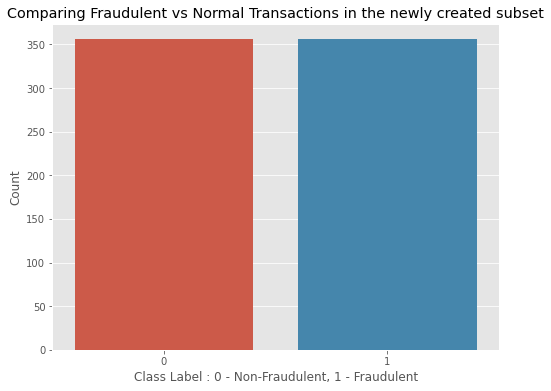

In [273]:
new_counts = selected_subet.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Comparing Fraudulent vs Normal Transactions in the newly created subset')
plt.ylabel('Count')
plt.xlabel('Class Label : 0 - Non-Fraudulent, 1 - Fraudulent')


<h5> Correlation of the feature to the target variable </h5>

In [275]:
corr = selected_subet.corr()
corr = corr[['Class']]
corr

Class
V1                -0.413
V2                 0.495
V3                -0.566
V4                 0.718
V5                -0.355
V6                -0.428
V7                -0.477
V8                 0.093
V9                -0.543
V10               -0.619
V11                0.672
V12               -0.688
V13               -0.064
V14               -0.742
V15               -0.063
V16               -0.582
V17               -0.543
V18               -0.458
V19                0.277
V20                0.143
V21                0.142
V22                0.025
V23               -0.033
V24               -0.121
V25                0.006
V26                0.062
V27                0.111
V28                0.082
Class              1.000
Normalized_Amount  0.019
Normalized_Time   -0.154

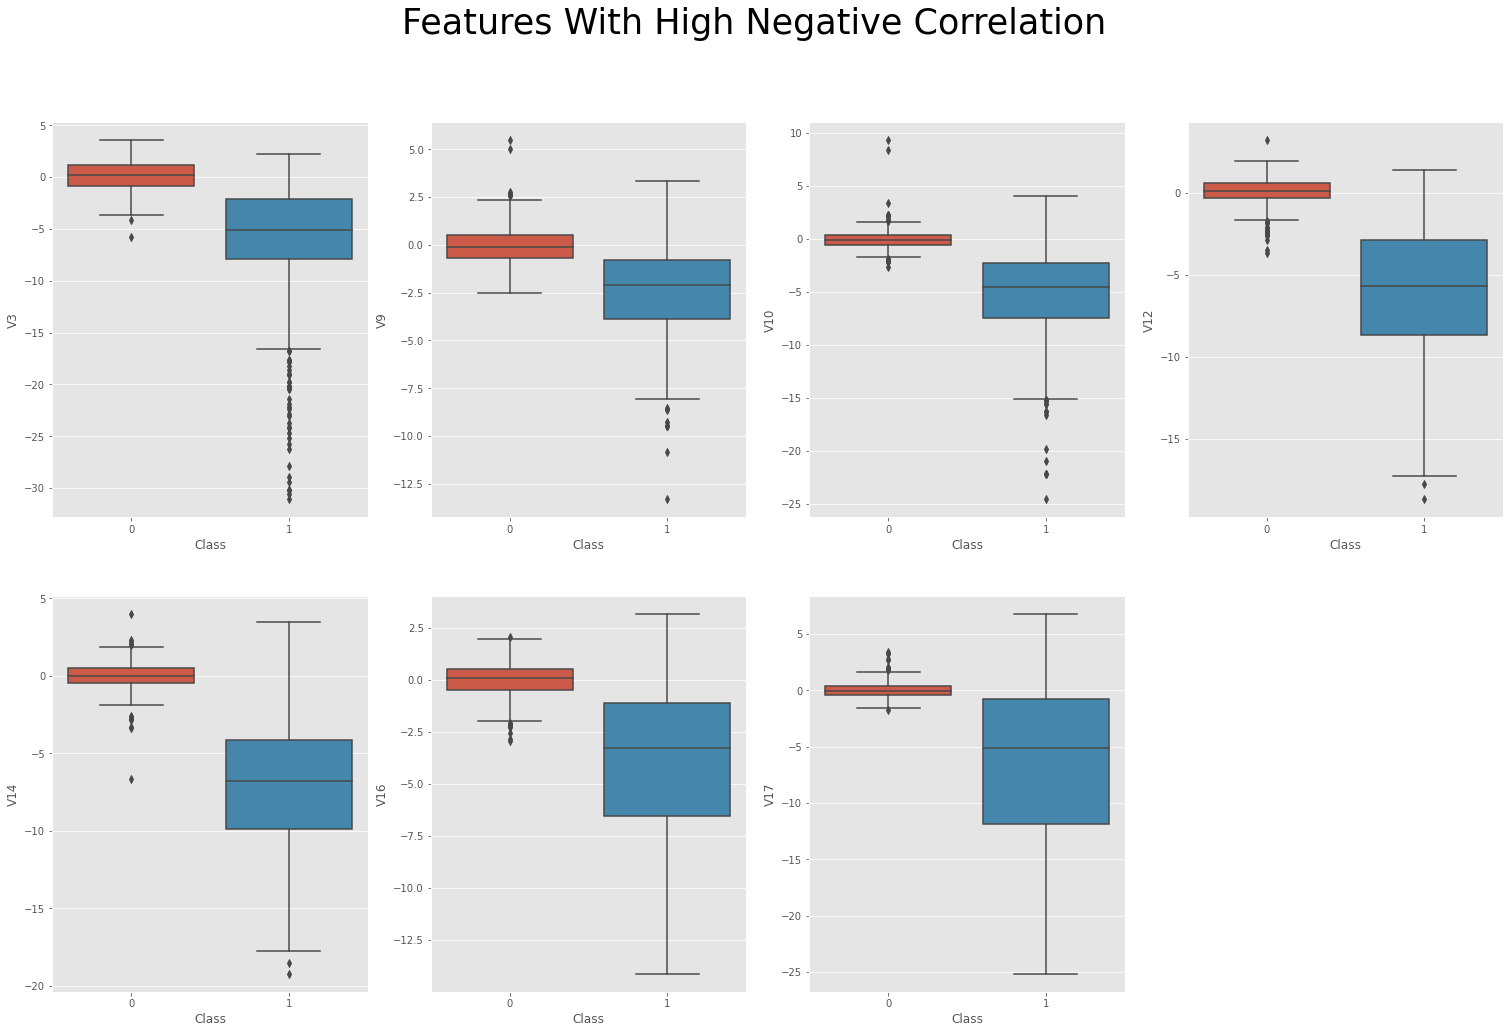

In [280]:
#visualizing the features w high negative correlation
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(26,16))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=selected_subet, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=selected_subet, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=selected_subet, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=selected_subet, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=selected_subet, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=selected_subet, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=selected_subet, ax=axes[1,2])
f.delaxes(axes[1,3])


<AxesSubplot:xlabel='Class', ylabel='V11'>

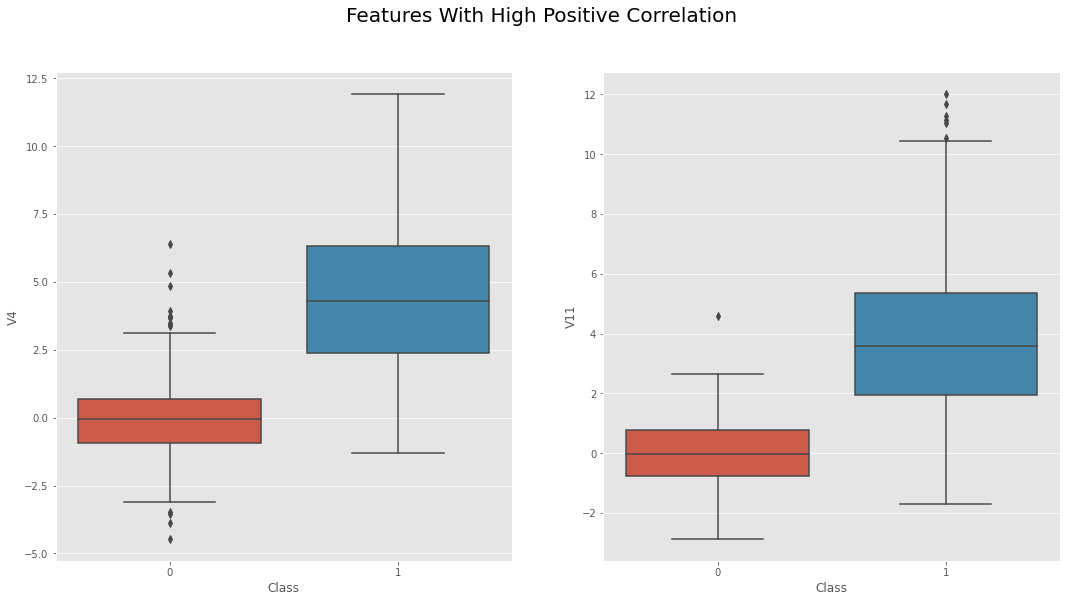

In [284]:
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,9))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=selected_subet, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=selected_subet, ax=axes[1])

These visualizations helps us in identifying that there are some extreme outliers in the data that we took as train set which can influence the model to create either a bias or makes it extrmely difficult to generalize the input data so in turn creates a overfitted model. In order to treat that we can go ahead and remove the extreme outliers from the data.

<h4>Treatments to remove extreme outlier</h4>

In [285]:
Q1 = selected_subet.quantile(0.25)
Q3 = selected_subet.quantile(0.75)
IQR = Q3 - Q1

altered_df = selected_subet[~((selected_subet < (Q1 - 2.5 * IQR)) |(selected_subet > (Q3 + 2.5 * IQR))).any(axis=1)]
altered_df.head()

V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  ...  \
0 -0.276  0.253 -0.866 -1.101 -0.605 -0.239  0.565  0.178  1.055 -1.012  ...   
1 -0.769  1.342 -2.171 -0.152 -0.648 -0.974 -1.707  0.314 -1.982 -3.158  ...   
3 -2.306 -2.004  0.850 -1.576 -0.504 -0.454 -1.384  0.419 -2.266  1.144  ...   
4 -1.181  1.126  1.307  1.289 -0.176  0.259  0.169  0.564 -0.723 -0.177  ...   
5 -0.885  1.791 -0.945  3.853 -1.544  0.189 -2.988  1.344 -2.295 -1.886  ...   

     V22    V23    V24    V25    V26    V27    V28  Class  Normalized_Amount  \
0  1.144 -0.258  0.801 -0.027  1.003 -0.318 -0.188      0              0.175   
1 -0.754 -0.047  0.358 -0.287  0.477  0.251  0.251      1             -0.193   
3 -0.122 -1.045 -0.402  0.189  0.114  0.062 -0.416      0              0.019   
4  0.325 -0.052  0.242  0.082 -0.236 -0.204  0.005      0             -0.273   
5  0.551 -0.035 -0.568 -0.528  0.259  0.507  0.177      1             -0.323   

   Normalized_Time  
0            0.800  
1            0.640  
3            1.513  
4           -0.214  
5           -0.283  

[5 rows x 31 columns]

In [286]:
altered_df.shape

(504, 31)

In [287]:
print("After removing the extreme outliers from the training data, the shape has from {} to {}".format(selected_subet.shape, altered_df.shape)
     )

After removing the extreme outliers from the training data, the shape has from (712, 31) to (504, 31)


<h4>Dimensionality Reduction</h4>

In [386]:
X = altered_df.drop('Class', axis=1)
y = altered_df['Class']

X_TSNE = TSNE(n_components=2, random_state=42).fit_transform(X.values)

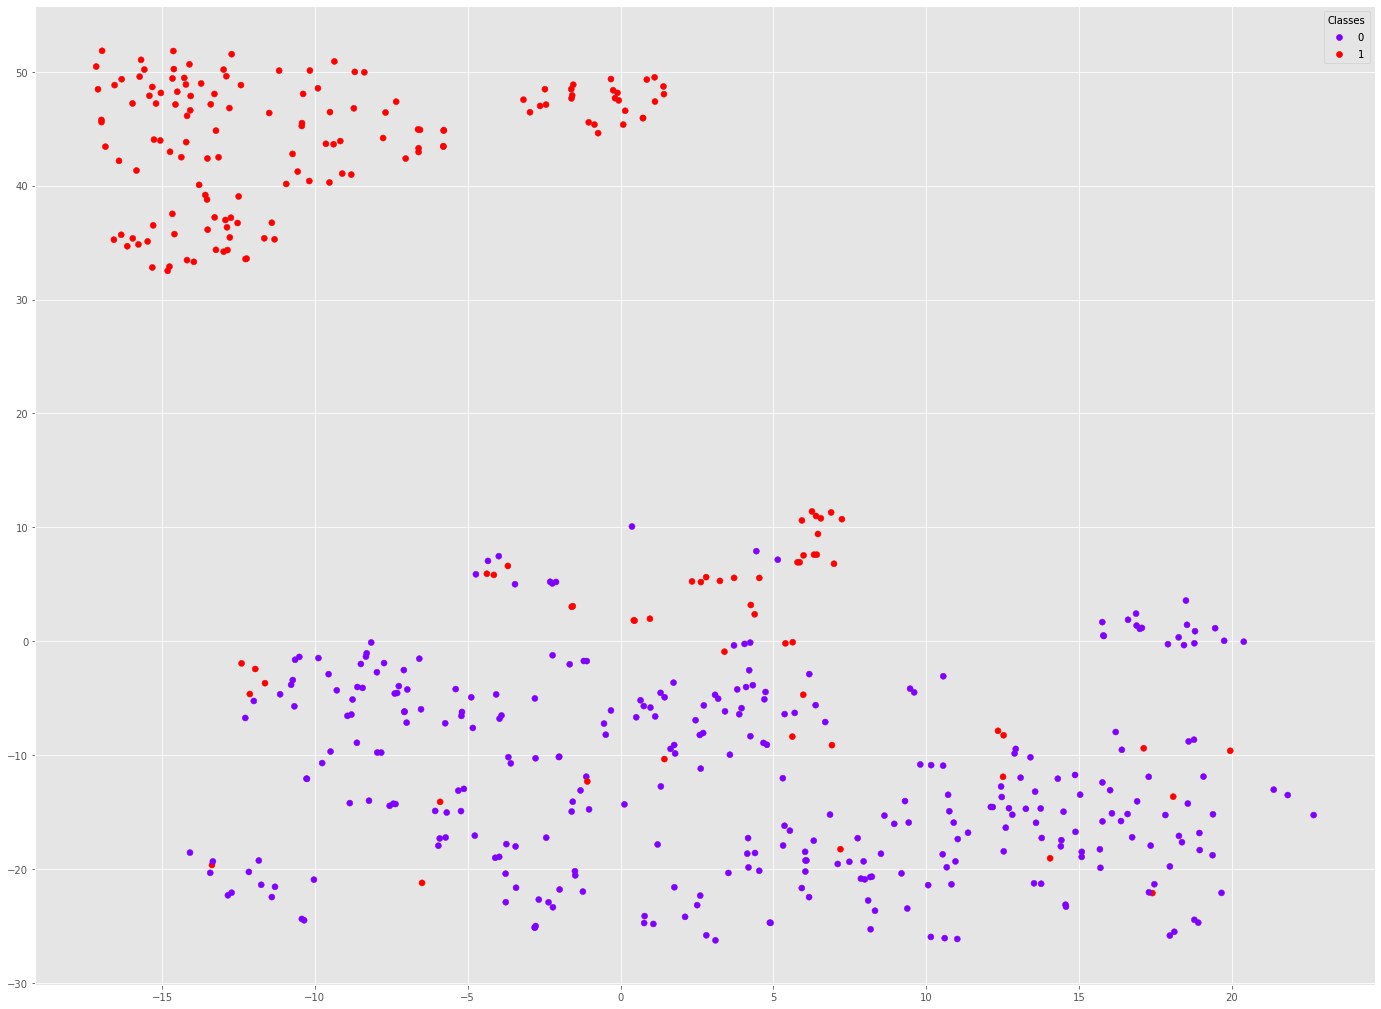

In [411]:
fig, ax = plt.subplots(figsize=(24,18))

scatter = ax.scatter(X_TSNE[:,0], X_TSNE[:,1], c=y, cmap='rainbow')

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Classes")
ax.add_artist(legend1)

plt.show()

<center>Class 0 - Normal Transactions          <br />
Class 1 - Fradulent Transactions </center>

<h4>Model Selection</h4>

In [416]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [417]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [440]:
print('X_shapes:\n', 'X_train:', 'X_test:\n', X_train.shape, X_test.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'y_test:\n', y_train.shape, y_test.shape)


X_shapes:
 X_train: X_test:
 (403, 30) (101, 30) 

Y_shapes:
 Y_train: y_test:
 (403,) (101,)


In [426]:
models = []

models.append(('Logistic Regression', LogisticRegression()))
models.append(('Linear Discriminant Analysis', LinearDiscriminantAnalysis()))
models.append(('KNeighbors Classifier', KNeighborsClassifier()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('Support Vector Machine', SVC()))
models.append(('Random Forest Classifier', RandomForestClassifier()))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

Logistic Regression: 0.971550 (0.018677)
Linear Discriminant Analysis: 0.968301 (0.024112)
KNeighbors Classifier: 0.965070 (0.026803)
DecisionTreeClassifier: 0.884393 (0.050526)
Support Vector Machine: 0.973495 (0.017706)
Random Forest Classifier: 0.974746 (0.018845)


After looking at the results looks like random forest has higher mean score and after that SVM seems to have higher mean score. Lets fit the model & calculate the accuracy for those models alone.

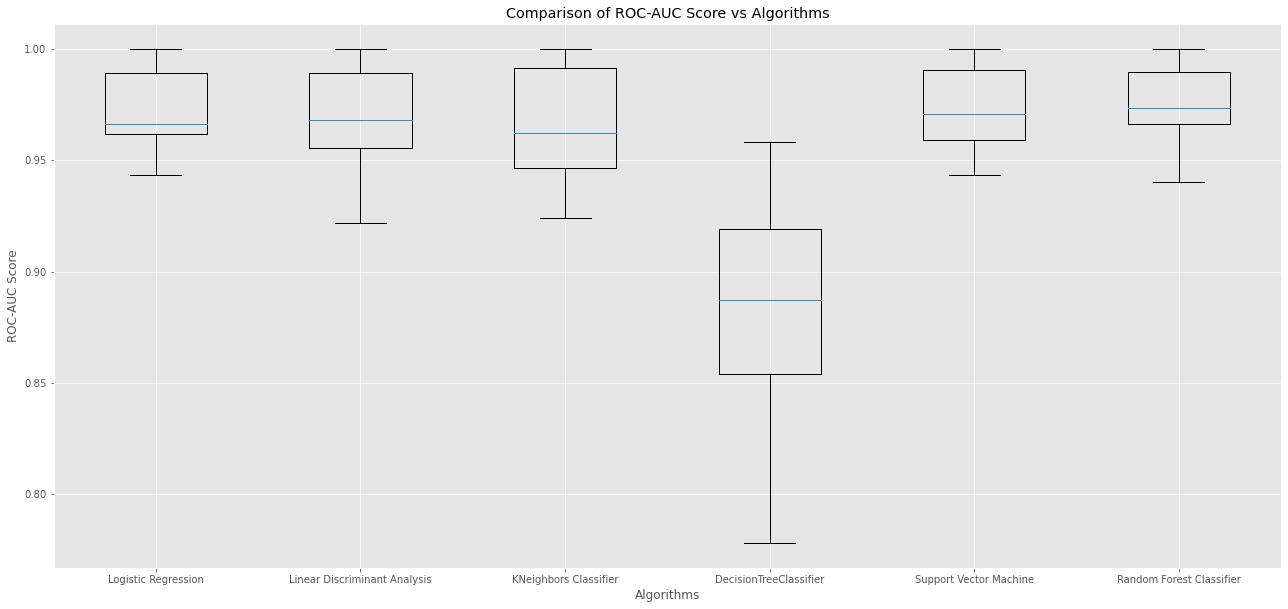

In [437]:
fig = plt.figure(figsize=(22,10))
plt.title('Comparison of ROC-AUC Score vs Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

In [439]:
#visualizing RF
rf_model = RandomForestClassifier(n_estimators=10)

# Train
rf_model.fit(X_train, y_train)
# Extract single tree
estimator = rf_model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', feature_names = X.columns.tolist(),class_names = ['0',' 1'],rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])


# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')


In [461]:
y_pred_rf=model.predict(X_test)
print("Random Forest Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.9504950495049505


In [485]:
clf = make_pipeline(StandardScaler(), SVC(gamma='scale'))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [462]:
y_pred_svm = clf.predict(X_test)
print("Support Vector Machine Accuracy:",metrics.accuracy_score(y_test, y_pred_svm))

Support Vector Machine Accuracy: 0.9504950495049505


Since the dataset is too small both the models seems to be producing same accuracy which is a good sign. It means RF & SVM both are perfect to used to as model for this dataset to identify the fradualent actiivites in the credit card transactions based on the given dataset. But taking the above ROC-AUC scores after cross valiation along with the accuracy value Random forest might be considered as more suitable model technique for this dataset to identify the credit card transactions fradulent activites. 

<h5> Model Evaluation </h5>

In [463]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score
def metrics_score(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))

Confusion Matrix - Support Vector Machine


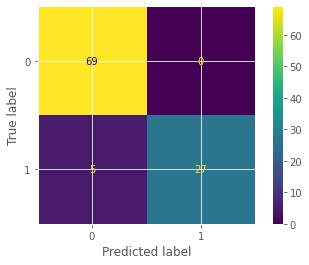

In [487]:
print("Confusion Matrix - Support Vector Machine")
plot_confusion_matrix( clf, X_test, y_test)

In [483]:
print("Evaluation of SVM Model")
metrics_score(y_test, y_pred_svm.round())

Evaluation of SVM Model
Accuracy: 0.95050
Precision: 1.00000
Recall: 0.84375
F1-score: 0.91525


Confusion Matrix - Random Forest


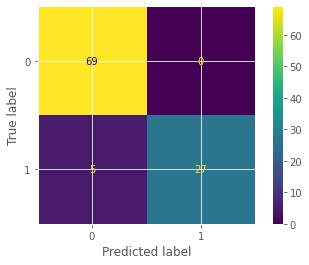

In [488]:
print("Confusion Matrix - Random Forest")
plot_confusion_matrix( rf_model, X_test, y_test)

In [489]:
print("Evaluation of Random Forest Model")
metrics_score(y_test, y_pred_rf.round())

Evaluation of Random Forest Model
Accuracy: 0.95050
Precision: 1.00000
Recall: 0.84375
F1-score: 0.91525


Even the accuracy scores shows the same result proving the fact that both the classification algorithms works greaterly on the credit card fradulent transaction identification process. With the help of this modelling techinque more datas can be classified and identified as normal or fraud transaction to help the finance team in reducing the cost incurred due to the wrong classification or misidentification of the transactions. 

<h5>Alternate approach - SMOTE</h5>

Another approach to address the class- imbalanced dataset is SMOTE - Synthetic Minority Oversampling Technique, is a method of data augmentation for the minority class. SMOTE is a over sampling approach. The easiest solution entails doubling examples in the minority class, even though these examples contribute no new data to the model.


In [491]:
Y = df_copy["Class"]
X = df_copy.drop(["Class"], axis= 1)

In [495]:
from imblearn.over_sampling import SMOTE
from collections import Counter

X_resampled, Y_resampled = SMOTE().fit_resample(X, Y)
print("Resampled shape of X: ", X_resampled.shape)
print("Resampled shape of Y: ", Y_resampled.shape)
value_counts = Counter(Y_resampled)
print(value_counts)
(train_X, test_X, train_Y, test_Y) = train_test_split(X_resampled, Y_resampled, test_size= 0.3, random_state= 42)

Resampled shape of X:  (568630, 30)
Resampled shape of Y:  (568630,)
Counter({0: 284315, 1: 284315})


In [513]:
#visualizing RF
rf_model2 = RandomForestClassifier(n_estimators=10)
print(datetime.now().strftime("%H:%M:%S"))
# Train
rf_model2.fit(train_X, train_Y)
print(datetime.now().strftime("%H:%M:%S"))
y_pred_rf2=rf_model2.predict(test_X)
print("Random Forest Accuracy:",metrics.accuracy_score(test_Y, y_pred_rf2))


01:39:09
01:39:25
Random Forest Accuracy: 0.9998651730181899


Confusion Matrix - Random Forest


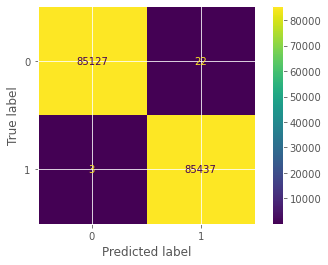

In [507]:
print("Confusion Matrix - Random Forest")
plot_confusion_matrix( rf_model2, test_X, test_Y)

In [509]:
print("Evaluation of Random Forest Model")
metrics_score(test_Y, y_pred_rf2.round())

Evaluation of Random Forest Model
Accuracy: 0.99985
Precision: 0.99974
Recall: 0.99996
F1-score: 0.99985


In [514]:
clf2 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
print(datetime.now().strftime("%H:%M:%S"))
clf2.fit(train_X, train_Y)
print(datetime.now().strftime("%H:%M:%S"))


01:39:48
01:58:48


In [515]:
y_pred_svm2 = clf2.predict(test_X)
print("Support Vector Machine Accuracy:",metrics.accuracy_score(test_Y, y_pred_svm2))

Support Vector Machine Accuracy: 0.9927779634091295


Confusion Matrix - SVM


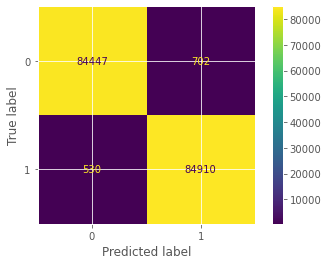

In [518]:
print("Confusion Matrix - SVM")
plot_confusion_matrix( clf2, test_X, test_Y)


In [519]:
print("Evaluation of SVM Model")
metrics_score(test_Y, y_pred_svm2.round())

Evaluation of SVM Model
Accuracy: 0.99278
Precision: 0.99180
Recall: 0.99380
F1-score: 0.99280


<h4> Results and Discussion: <h4/>

After looking at the SMOTE & selected approach we can identify that both models perform well in classifying the data transaction as fraud or non-fraud data. Also looking at the execution time we can clearly single out the Random Forest Classification as the best classification algorithm. Now, it is clearly evident that the model performed much better than the previous Random Forest classifier without SMOTE approach. Even looking at the evaluation metrics it is clear that the Random Forest model has performed really well in classifying the dataset transactions correctly as Fraud and Normal transactions.

Next steps can be identified as deploying this model and connecting it to direct data sources so it is periodically feed with the new data.

Future development can be identified as adding an additional step of learning from its prediction comparision with the real data result and reclassifying it in the dataset and making the model to learn from it's past mistakes. This could be a very beneficial step in the classification technique. 

Thus in this notebook we have performed 
<ul>
<li> Exploratory data analysis to learn about the dataset & different trends shown by the features</li>
<li> Pre-processed to handle the imbalanced dataset so model is not biased heavily</li>
<li> Built different models and checked their scores to identify the best machine learning classification algorithm</li>
<li> Calculated all the evaluation metrics for the best two models identifed to find the best of best model</li>
<li> Used SMOTE & selected dataset approach to compensate for the imbalanced class labels dataset</li>
<li> Rerun the two best models Random Forest, SVM and used the evaluation metrics & execution time to identify the good model among both.</li>
<li> Finally Random Forest Classifier was identified as best model to be deployed and used for classifying data as Normal or Fraudulent transaction.</li>
 </ul>